# Create univariate and multivariate distributions: a quick start guide to distributions

## Abstract 

In this example, we present classes for univariate and multivariate distributions. We demonstrate the probabilistic programming capabilities of the library. For univariate distributions, we show how to compute the probability density, the cumulated probability density and the quantiles. We also show how to create graphics. The `ComposedDistribution` class, which creates a distribution based on its marginals and its copula, is presented. We show how to truncate any distribution with the `TruncatedDistribution` class.

## Univariate distribution

The library is a probabilistic programming library: it is possible to create a random variable and perform operations on this variable *without* generating a sample. 

In the OpenTURNS platform, several *univariate distributions* are implemented. The most commonly used are:

 - `Uniform`,
 - `Normal`,
 - `Beta`, 
 - `LogNormal`, 
 - `Exponential`, 
 - `Weibull`.

In [1]:
import openturns as ot

## The uniform distribution

Let us create a uniform random variable $\mathcal{U}(2,5)$.

In [2]:
uniform = ot.Uniform(2,5)

The `drawPDF` method plots the probability density function.

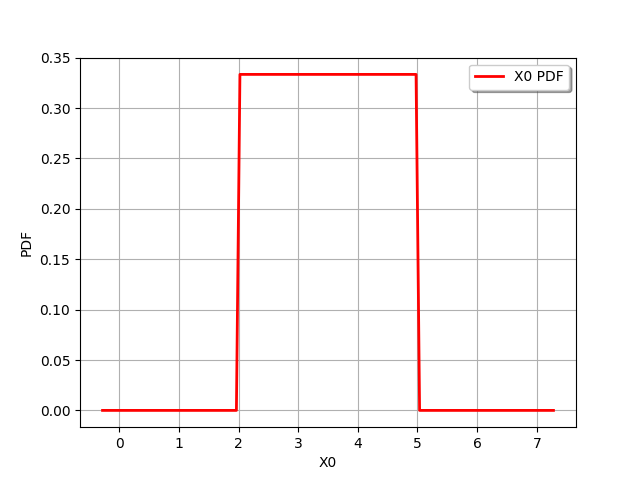

In [3]:
uniform.drawPDF()

The `computePDF` method computes the probability distribution at a specific point.

In [4]:
uniform.computePDF(3.5)

0.3333333333333333

The `drawCDF` method plots the cumulated distribution function.

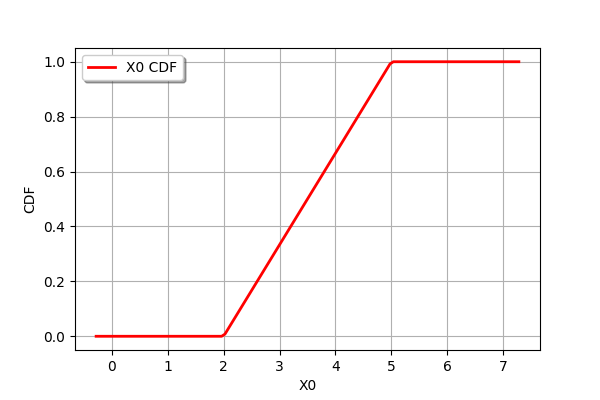

In [5]:
uniform.drawCDF()

The `computeCDF` method computes the value of the cumulated distribution function a given point.

In [6]:
uniform.computeCDF(3.5)

0.5

The `getSample` method generates a sample.

In [7]:
sample = uniform.getSample(10)
sample

class=Sample name=Uniform implementation=class=SampleImplementation name=Uniform size=10 dimension=1 description=[X0] data=[[3.88963],[4.64842],[2.40583],[2.09751],[3.04117],[4.90827],[4.76204],[3.50912],[2.18962],[2.87827]]

The most common way to "see" a sample is to plot the empirical histogram. 

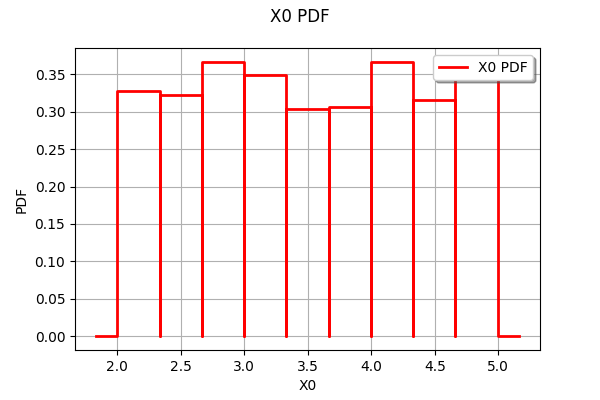

In [8]:
sample = uniform.getSample(1000)
ot.HistogramFactory().build(sample).drawPDF()

## Multivariate distributions with or without independent copula

We can create multivariate distributions by two different methods:

- we can also create a multivariate distribution by combining a list of univariate marginal distribution and a copula,
- some distributions are defined as multivariate distributions: `Normal`, `Dirichlet`, `Student`.

Since the method based on a marginal and a copula is more flexible, we illustrate below this principle.

In the following script, we define a bivariate distribution made of two univariate distributions (Gaussian and uniform) and an independent copula. 

The second input argument of the `ComposedDistribution` class is optional: if it is not specified, the copula is independent by default. 

In [9]:
normal = ot.Normal()
uniform = ot.Uniform()
distribution = ot.ComposedDistribution([normal, uniform])
distribution

class=ComposedDistribution name=ComposedDistribution dimension=2 copula=class=IndependentCopula name=IndependentCopula dimension=2 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Uniform name=Uniform dimension=1 a=-1 b=1

We can also use the `IndependentCopula` class.

In [10]:
normal = ot.Normal()
uniform = ot.Uniform()
copula = ot.IndependentCopula(2)
distribution = ot.ComposedDistribution([normal, uniform], copula)
distribution

class=ComposedDistribution name=ComposedDistribution dimension=2 copula=class=IndependentCopula name=IndependentCopula dimension=2 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Uniform name=Uniform dimension=1 a=-1 b=1

We see that this produces the same result: in the end of this section, we will change the copula and see what happens.

The `getSample` method produces a sample from this distribution.

In [11]:
distribution.getSample(10)

class=Sample name=ComposedDistribution implementation=class=SampleImplementation name=ComposedDistribution size=10 dimension=2 description=[X0,X1] data=[[1.25989,0.0830285],[-2.15135,0.212337],[0.638385,-0.319469],[1.1986,-0.333557],[0.576051,-0.473865],[-2.72106,0.694488],[-0.456634,0.752554],[0.834452,-0.199093],[0.189723,-0.490214],[-1.5599,-0.666033]]

In order to visualize a bivariate sample, we can use the `Cloud` class.

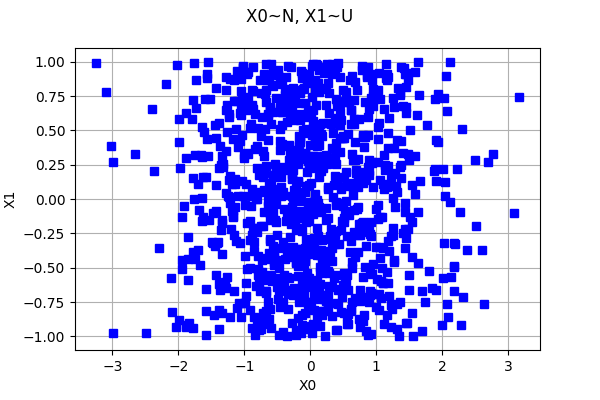

In [12]:
sample = distribution.getSample(1000)
showAxes = True
graph = ot.Graph("X0~N, X1~U", "X0", "X1", showAxes)
cloud = ot.Cloud(sample, "blue", "fsquare", "") # Create the cloud
graph.add(cloud) # Then, add it to the graph
graph

We see that the marginals are Gaussian and uniform and that the copula is independent. 

## Define a plot a copula

The `NormalCopula` class allows to create a Gaussian copula. Such a copula is defined by its correlation matrix.

In [13]:
R = ot.CorrelationMatrix(2)
R[0,1] = 0.6
copula = ot.NormalCopula(R)
copula

class=NormalCopula name=NormalCopula dimension=2 correlation=class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.6,0.6,1]

We can draw the contours of a copula with the `drawPDF` method.

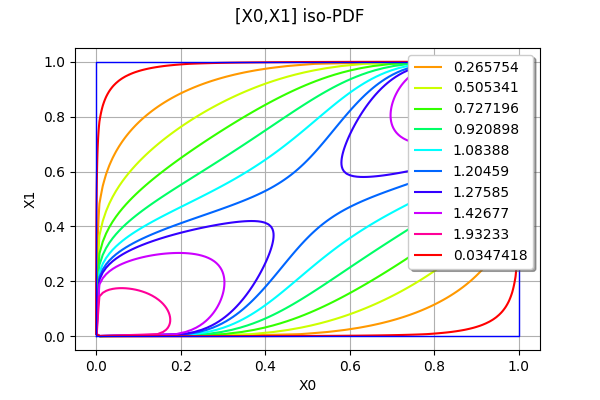

In [14]:
copula.drawPDF()

## Multivariate distribution with arbitrary copula

Now that we know that we can define a copula, we create a bivariate distribution with normal and uniform marginals and an arbitrary copula. We select the the Ali-Mikhail-Haq copula as an example of a non trivial dependence. 

In [15]:
normal = ot.Normal()
uniform = ot.Uniform()
theta = 0.9
copula = ot.AliMikhailHaqCopula(theta)
distribution = ot.ComposedDistribution([normal, uniform], copula)
distribution

class=ComposedDistribution name=ComposedDistribution dimension=2 copula=class=AliMikhailHaqCopula name=AliMikhailHaqCopula dimension=2 theta=0.9 marginal[0]=class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1] marginal[1]=class=Uniform name=Uniform dimension=1 a=-1 b=1

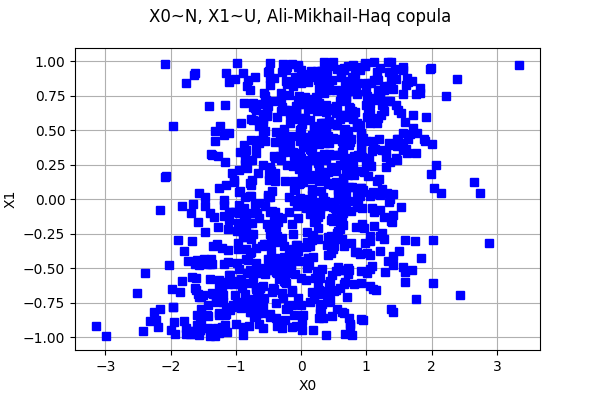

In [16]:
sample = distribution.getSample(1000)
showAxes = True
graph = ot.Graph("X0~N, X1~U, Ali-Mikhail-Haq copula", "X0", "X1", showAxes)
cloud = ot.Cloud(sample, "blue", "fsquare", "") # Create the cloud
graph.add(cloud) # Then, add it to the graph
graph

We see that the sample is quite different from the previous sample with independent copula.

## Draw several distributions in the same plot

It is sometimes convenient to create a plot presenting the PDF and CDF on the same graphics. This is possible thanks to Matplotlib.

In [17]:
beta = ot.Beta(5, 7, 9, 10)
pdfbeta = beta.drawPDF()
cdfbeta = beta.drawCDF()
exponential = ot.Exponential(3)
pdfexp = exponential.drawPDF()
cdfexp = exponential.drawCDF()

In [18]:
import openturns.viewer as otv

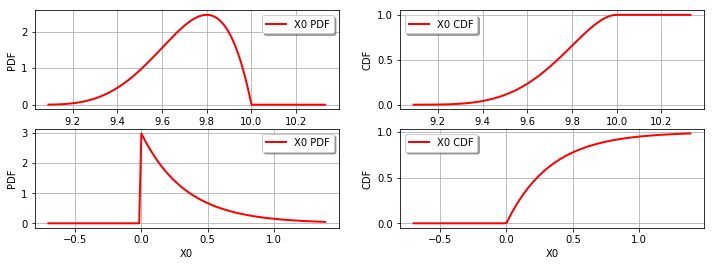

In [19]:
import pylab as plt
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(2, 2, 1)
_ = otv.View(pdfbeta, figure=fig, axes=[ax])
ax = fig.add_subplot(2, 2, 2)
_ = otv.View(cdfbeta, figure=fig, axes=[ax])
ax = fig.add_subplot(2, 2, 3)
_ = otv.View(pdfexp, figure=fig, axes=[ax])
ax = fig.add_subplot(2, 2, 4)
_ = otv.View(cdfexp, figure=fig, axes=[ax])

## Truncate a distribution

Any distribution can be truncated with the `TruncatedDistribution` class. 

Let $f_X$ (resp. $F_X$) the PDF (resp. the CDF) of the real random variable $X$. Let $a$ and $b$ two reals with $a<b$. Let $Y$ be the random variable $max(a, min(b, X))$. Its distribution is the distribution of $X$ truncated to the $[a,b]$ interval. 

Therefore, the PDF of $Y$ is:

$$
f_Y(y) = \frac{f_X(y)}{F_X(b) - F_X(a)}
$$

if $y\in[a,b]$ and $f_Y(y)=0$ otherwise. 

Consider for example the log-normal variable $X$ with mean $\mu=0$ and standard deviation $\sigma=1$. 

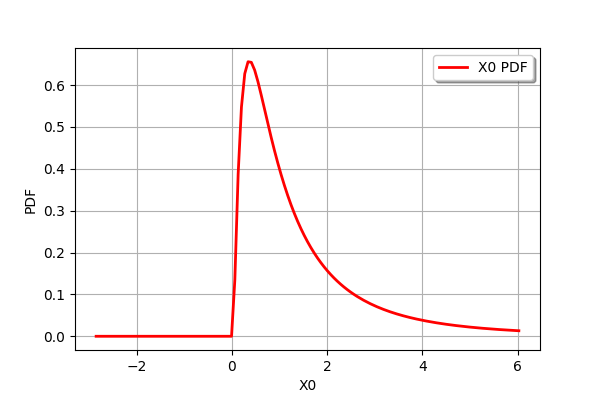

In [20]:
X = ot.LogNormal()
X.drawPDF()

We can truncate this distribution to the $[1,2]$ interval. We see that the PDF of the distribution becomes discontinuous at the truncation points 1 and 2.

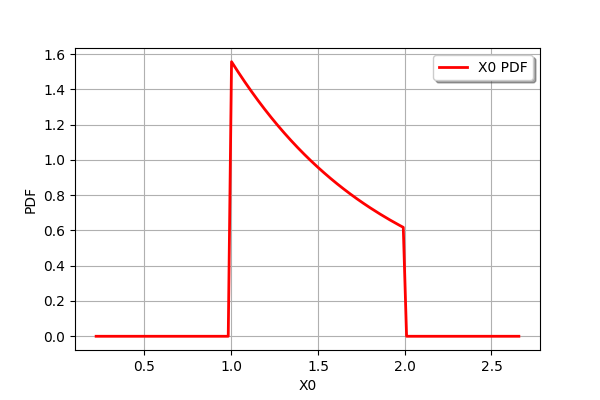

In [21]:
Y = ot.TruncatedDistribution(X,1.,2.)
Y.drawPDF()

We can also also truncate it with only a lower bound.

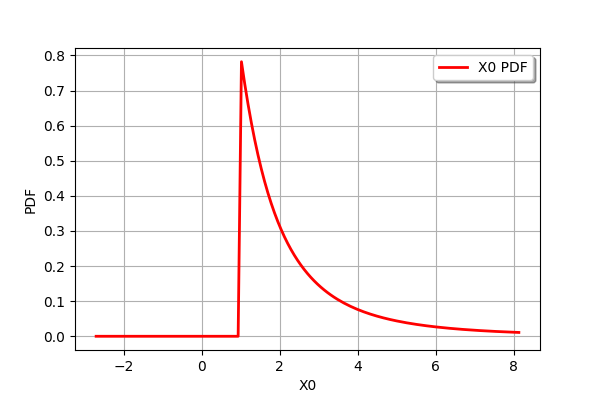

In [22]:
Y = ot.TruncatedDistribution(X,1.,ot.TruncatedDistribution.LOWER)
Y.drawPDF()

We can finally truncate a distribution with an upper bound.

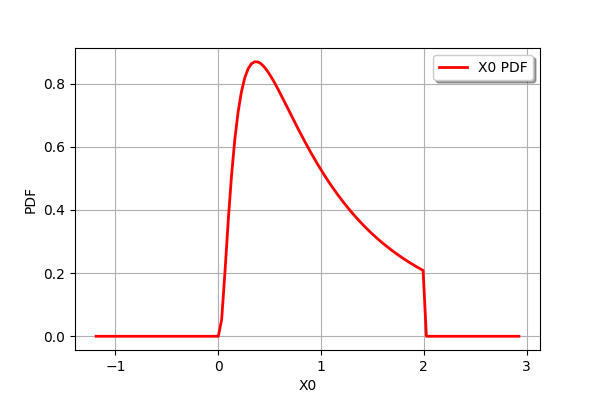

In [23]:
Y = ot.TruncatedDistribution(X,2.,ot.TruncatedDistribution.UPPER)
Y.drawPDF()

In the specific case of the Gaussian distribution, the specialized `TruncatedNormal` distribution can be used instead of the generic `TruncatedDistribution` class.